In [72]:
# Importar librerías necesarias
import numpy as np
import pandas as pd
from time import time
from IPython.display import display

from sklearn import svm, metrics
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

%matplotlib inline

In [73]:
df = pd.read_csv("data/seeds.csv")
# Vemos cómo es nuestro dataset
print("Filas: " + str(df.shape[0]) + " Cols: " + str(df.shape[1]))
display(df.head(10))

Filas: 210 Cols: 8


,V1,V2,V3,V4,V5,V6,V7,Class
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
5,14.38,14.21,0.8951,5.386,3.312,2.462,4.956,1
6,14.69,14.49,0.8799,5.563,3.259,3.586,5.219,1
7,14.11,14.10,0.8911,5.420,3.302,2.700,5.000,1
8,16.63,15.46,0.8747,6.053,3.465,2.040,5.877,1
9,16.44,15.25,0.8880,5.884,3.505,1.969,5.533,1


In [74]:
df.isnull().any()
print("Info:")
df.info()

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 8 columns):
V1       210 non-null float64
V2       210 non-null float64
V3       210 non-null float64
V4       210 non-null float64
V5       210 non-null float64
V6       210 non-null float64
V7       210 non-null float64
Class    210 non-null int64
dtypes: float64(7), int64(1)
memory usage: 13.2 KB


In [75]:
# Some more additional data analysis
display(np.round(df.describe()))

,V1,V2,V3,V4,V5,V6,V7,Class
count,210.0,210.0,210.0,210.0,210.0,210.0,210.0,210.0
mean,15.0,15.0,1.0,6.0,3.0,4.0,5.0,2.0
std,3.0,1.0,0.0,0.0,0.0,2.0,0.0,1.0
min,11.0,12.0,1.0,5.0,3.0,1.0,5.0,1.0
25%,12.0,13.0,1.0,5.0,3.0,3.0,5.0,1.0
50%,14.0,14.0,1.0,6.0,3.0,4.0,5.0,2.0
75%,17.0,16.0,1.0,6.0,4.0,5.0,6.0,3.0
max,21.0,17.0,1.0,7.0,4.0,8.0,7.0,3.0


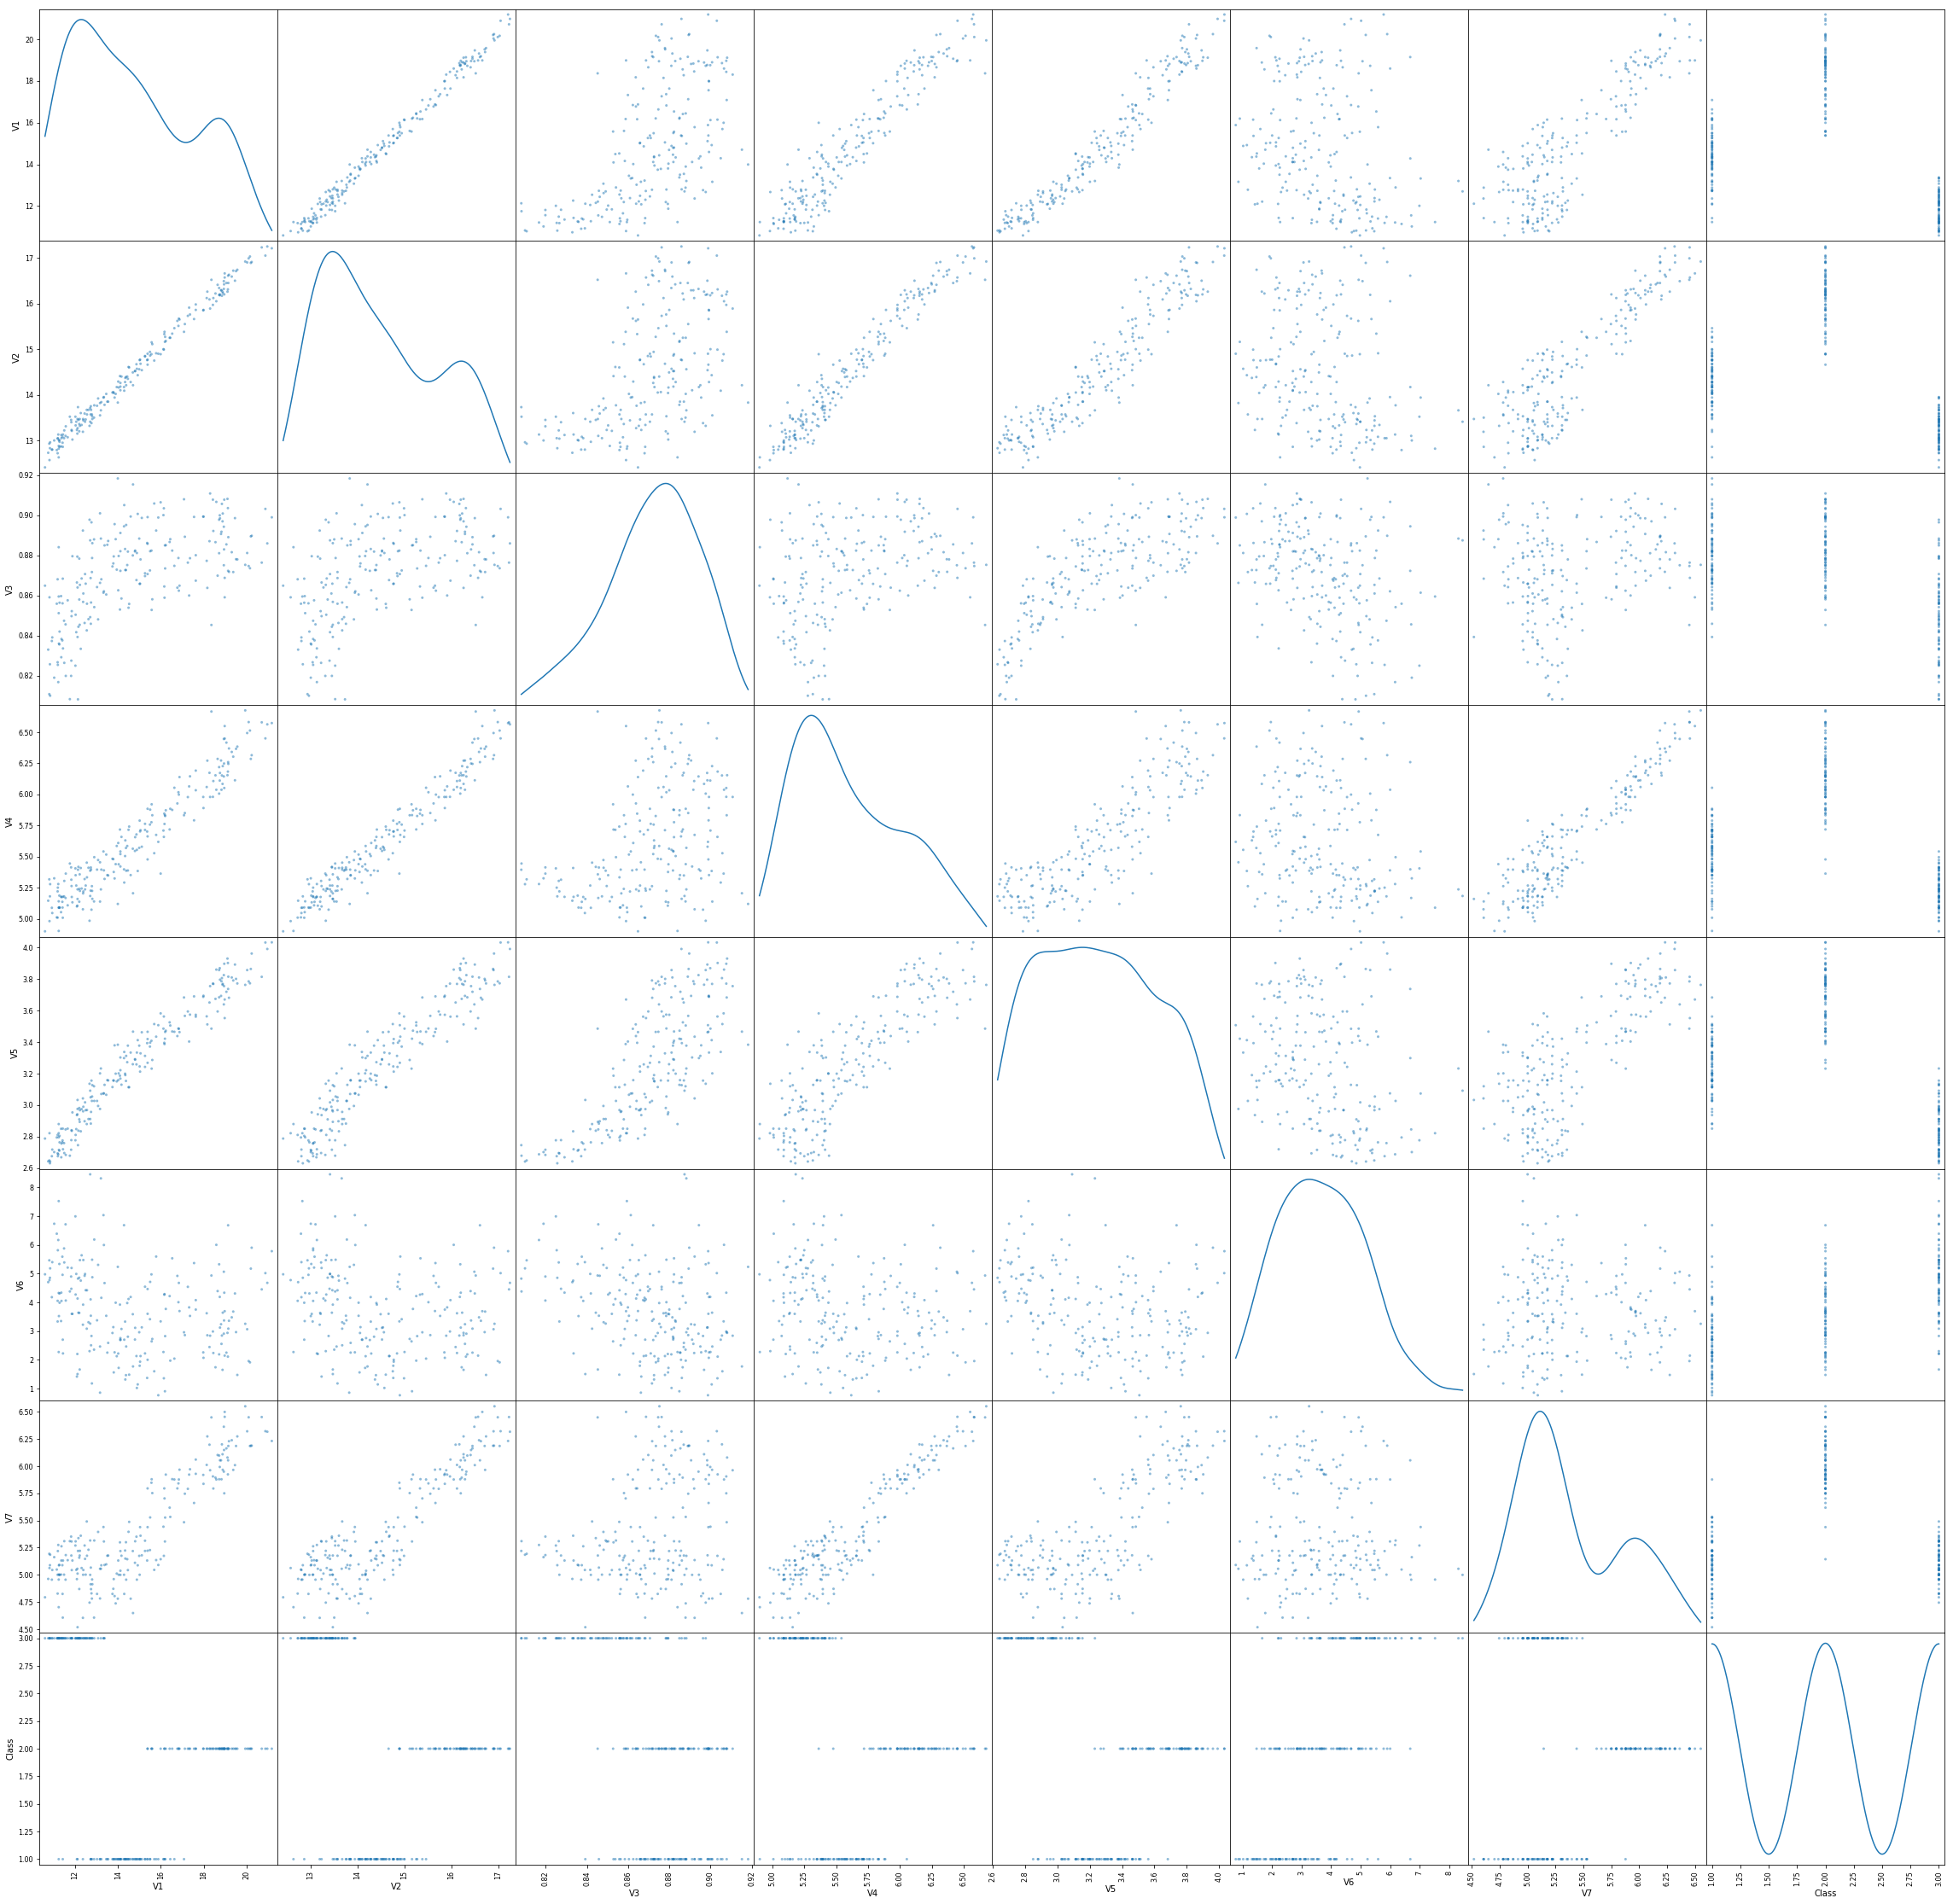

In [76]:
pd.plotting.scatter_matrix(df, figsize = (40,40), diagonal = 'kde');

,V1,V2,V3,V4,V5,V6,V7,Class
V1,1.000000,0.994341,0.608288,0.949985,0.970771,-0.229572,0.863693,-0.346058
V2,0.994341,1.000000,0.529244,0.972422,0.944829,-0.217340,0.890784,-0.327900
V3,0.608288,0.529244,1.000000,0.367915,0.761635,-0.331471,0.226825,-0.531007
V4,0.949985,0.972422,0.367915,1.000000,0.860415,-0.171562,0.932806,-0.257269
V5,0.970771,0.944829,0.761635,0.860415,1.000000,-0.258037,0.749131,-0.423463
V6,-0.229572,-0.217340,-0.331471,-0.171562,-0.258037,1.000000,-0.011079,0.577273
V7,0.863693,0.890784,0.226825,0.932806,0.749131,-0.011079,1.000000,0.024301
Class,-0.346058,-0.327900,-0.531007,-0.257269,-0.423463,0.577273,0.024301,1.000000


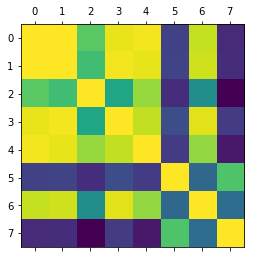

In [77]:
correlation = df.corr()
display(correlation)
plt.matshow(correlation)

In [78]:
# Feature Importance (pero aquí como las variables no nos dicen nada, no podemos sacar conclusiones

In [89]:
class_raw = df["Class"]
features_raw = df.drop(["Class"], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(features_raw, 
                                                    class_raw, 
                                                    test_size = 0.25, 
                                                    random_state = 42)
# Show the results of the split
print("El ds de training tiene {} elementos.".format(X_train.shape[0]))
print("El ds de testing tiene {} elementos.".format(X_test.shape[0]))

El ds de training tiene 157 elementos.
El ds de testing tiene 53 elementos.


In [91]:
classifier = svm.SVC(gamma="auto", kernel="poly")

# Entrenamos
classifier.fit(X_train, y_train)

# Predecimos con el test set
predicted = classifier.predict(X_test)

# Accuracy calculation
print("Precisión global: " + str(metrics.accuracy_score(y_test, predicted)))
print("Report:\n" + metrics.classification_report(y_test, predicted))

Precision global: 0.9622641509433962
Report:
              precision    recall  f1-score   support

           1       0.88      1.00      0.93        14
           2       1.00      1.00      1.00        18
           3       1.00      0.90      0.95        21

   micro avg       0.96      0.96      0.96        53
   macro avg       0.96      0.97      0.96        53
weighted avg       0.97      0.96      0.96        53

